In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

For the full tutorial on Geopandas:

https://github.com/jorisvandenbossche/geopandas-tutorial

This exercise has been modified in accordance to my learning path and interests.

# Case study - Conflict mapping: mining sites in eastern DR Congo

In this case study, we will explore a dataset on artisanal mining sites located in eastern DR Congo.

**Note**: this tutorial is meant as a hands-on session, and most code examples are provided as exercises to be filled in. I highly recommend actually trying to do this yourself, but if you want to follow the solved tutorial, you can find this in the `_solved` directory.

---

#### Background

[IPIS](http://ipisresearch.be/), the International Peace Information Service, manages a database on mining site visits in eastern DR Congo: http://ipisresearch.be/home/conflict-mapping/maps/open-data/

Since  2009, IPIS has visited artisanal mining sites in the region during various data collection campaigns. As part of these campaigns, surveyor teams visit mining sites in the field, meet with miners and complete predefined questionnaires. These contain questions about the mining site, the minerals mined at the site and the armed groups possibly present at the site.

Some additional links:

* Tutorial on the same data using R from IPIS (but without geospatial aspect): http://ipisresearch.be/home/conflict-mapping/maps/open-data/open-data-tutorial/
* Interactive web app using the same data: http://www.ipisresearch.be/mapping/webmapping/drcongo/v5/

## 1. Importing and exploring the data

### The mining site visit data

IPIS provides a WFS server to access the data. We can send a query to this server to download the data, and load the result into a geopandas GeoDataFrame:

In [158]:
import requests
import json
import geopandas
import pandas as pd

pd.set_option('display.max_colwidth', None)

wfs_url = "http://geo.ipisresearch.be/geoserver/public/ows"
params = dict(service='WFS', version='1.0.0', request='GetFeature',
              typeName='public:cod_mines_curated_all_opendata_p_ipis', outputFormat='json')

r = requests.get(wfs_url, params=params)
data_features = json.loads(r.content.decode('UTF-8'))

# Using deprecated init option.
#data_visits = geopandas.GeoDataFrame.from_features(data_features, crs={'init': 'epsg:4326'})

# Using current option: direct specification of the authority code, e.g. crs='epsg:4326'
data_visits_from_server = geopandas.GeoDataFrame.from_features(data_features, crs='epsg:4326')

print(data_visits_from_server.shape)
print(data_visits_from_server.columns)
data_visits_from_server.head()

(6955, 84)
Index(['geometry', 'vid', 'cid', 'id', 'source', 'project', 'pcode', 'name',
       'visit_date', 'visit_onsite', 'visit_onsite_novisitreason', 'longitude',
       'latitude', 'location_origin', 'province', 'province_old', 'territoire',
       'collectivite', 'groupement', 'village', 'workers_numb', 'access_dry',
       'access_wet', 'is_3t_mine', 'is_gold_mine', 'mineral1',
       'selling_points_mineral1', 'final_destination_mineral1', 'mineral2',
       'selling_points_mineral2', 'final_destination_mineral2', 'mineral3',
       'selling_points_mineral3', 'final_destination_mineral3', 'mercury',
       'presence', 'interference', 'armed_group1', 'type_armed_group1',
       'frequency_armed_group1', 'taxation_armed_group1',
       'commerce_taxation_armed_group1', 'entrance_taxation_armed_group1',
       'monopoly_armed_group1', 'buying_minerals_armed_group1',
       'digging_armed_group1', 'forced_labour_armed_group1',
       'pillaging_armed_group1', 'pit_ownership_armed_

,geometry,vid,cid,id,source,project,pcode,name,visit_date,visit_onsite,...,state_service1,state_service2,state_service3,state_service4,traceability,qualification,childunder15,childunder15work,women,womenwork
0,POINT (28.71526 0.33702),1,1,1,IPIS - Ministère des Mines,IPIS - 2009,codmine00191,Eohe,2009-01-01Z,1,...,None,None,None,None,None,None,NaN,None,NaN,None
1,POINT (28.69916 0.32153),2,2,2,IPIS - Ministère des Mines,IPIS - 2009,codmine00192,Eita,2009-01-01Z,1,...,None,None,None,None,None,None,NaN,None,NaN,None
2,POINT (28.18514 0.54499),3,3,3,IPIS - Ministère des Mines,IPIS - 2009,codmine00242,Mungu Iko,2009-01-01Z,1,...,None,None,None,None,None,None,NaN,None,NaN,None
3,POINT (28.88453 -0.35253),4,4,4,IPIS - Ministère des Mines,IPIS - 2009,codmine00260,Kiviri/Tayna,2009-01-01Z,1,...,None,None,None,None,None,None,NaN,None,NaN,None
4,POINT (28.90395 -0.03671),5,5,5,IPIS - Ministère des Mines,IPIS - 2009,codmine00272,Makanga,2009-01-01Z,1,...,None,None,None,None,None,None,NaN,None,NaN,None


However, the data is also provided in the tutorial materials as a GeoJSON file, so it is certainly available during the tutorial.

**Ozy's Note:**<br>
Note that the data contained in the enclosed GeoJSON file `data/cod_mines_curated_all_opendata_p_ipis.geojson` contains fewer columns and rows than  the data downloaded from the server above. This could reflect newer additions (3687 vs 6955 rows and 62 vs 84 columns) that have been added to the dataset since the tutorial was created and the GeoJSON of the (older) version of the dataset was included in the tutorial package. For consistency with the tutorial instructions, will use the dataset from the local GeoJSON file.


<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Read the GeoJSON file `data/cod_mines_curated_all_opendata_p_ipis.geojson` using geopandas, and call the result `data_visits`.</li>
  <li>Inspect the first 5 rows, and check the number of observations</li>
 </ul> 

</div>

In [152]:
data_visits = geopandas.read_file('data/cod_mines_curated_all_opendata_p_ipis.geojson')
print(data_visits.shape)
print(data_visits.crs)
print(data_visits.columns)
data_visits.head()

(3687, 62)
EPSG:4326
Index(['id', 'vid', 'source', 'project', 'pcode', 'name', 'visit_date',
       'visit_onsite', 'visit_onsite_novisitreason', 'longitude', 'latitude',
       'location_origin', 'province', 'province_old', 'territoire',
       'collectivite', 'groupement', 'village', 'workers_numb', 'is_3t_mine',
       'is_gold_mine', 'mineral1', 'selling_points_mineral1',
       'final_destination_mineral1', 'mineral2', 'selling_points_mineral2',
       'final_destination_mineral2', 'mineral3', 'selling_points_mineral3',
       'final_destination_mineral3', 'mercury', 'presence', 'interference',
       'armed_group1', 'type_armed_group1', 'frequency_armed_group1',
       'taxation_armed_group1', 'commerce_taxation_armed_group1',
       'entrance_taxation_armed_group1', 'monopoly_armed_group1',
       'buying_minerals_armed_group1', 'digging_armed_group1',
       'forced_labour_armed_group1', 'pillaging_armed_group1', 'armed_group2',
       'type_armed_group2', 'frequency_armed_grou

,id,vid,source,project,pcode,name,visit_date,visit_onsite,visit_onsite_novisitreason,longitude,...,digging_armed_group2,forced_labour_armed_group2,pillaging_armed_group2,state_service1,state_service2,state_service3,state_service4,itsci,qualification,geometry
0,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,1,IPIS - Ministère des Mines,IPIS - 2009,codmine00191,Eohe,2009-01-01,1,NaN,28.712580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (28.71258 0.33188)
1,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,2,IPIS - Ministère des Mines,IPIS - 2009,codmine00192,Eita,2009-01-01,1,NaN,28.699160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (28.69916 0.32153)
2,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,3,IPIS - Ministère des Mines,IPIS - 2009,codmine00242,Mungu Iko,2009-01-01,1,NaN,28.185142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (28.18514 0.54499)
3,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,4,IPIS - Ministère des Mines,IPIS - 2009,codmine00260,Kiviri/Tayna,2009-01-01,1,NaN,28.884528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (28.88453 -0.35253)
4,cod_mines_curated_all_opendata_p_ipis.fid-11f0...,5,IPIS - Ministère des Mines,IPIS - 2009,codmine00272,Makanga,2009-01-01,1,NaN,28.903945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (28.90395 -0.03671)


### Check Types and Values of Geometry Objects

* We will apply spatial operations later (distance etc.). Convert CRS to UTM (epsg=32735 is UTM Zone 35 South).
* Verify that all geometry objects are of `shapely.Geometry.Point` type (`shape.get_type_id = 0`).
* Decompose the easting (x) and northing (y) coordinates of each geometry (in meters).
    * The UTM zone is in the southern hemisphere, so the 1.e+10 (10 million) false northing is applied to the equator line.
    * If you see y values in excess of 10 million, then the locations are north of equator (in the northern hemisphere).
    * The easting (x) coordinate is centered at the central meridian with the value of 500,000 m East. The range of easting coordinate varies from 834km at the equator to 166 km nearest the poles. The range of x of (87km to 903km) suggests we are well within the Zone 35 S.

In [179]:
import shapely
mine_0 = data_visits.iloc[0].geometry

# Convert CRS to UTM 35 South
data_visits_utm = data_visits.to_crs(epsg=32735)

# Get the geometry type of each record (should be shapely.Geometry.Point).
data_visits_utm['geometry_type'] = data_visits_utm.geometry.apply(lambda c : shapely.get_type_id(c))
print(data_visits_utm.geometry_type.value_counts())

# Decompose the easting (x) and northing (y) of the UTM coordinates.
data_visits_utm['geometry_x'] = data_visits_utm.geometry.apply(lambda c : c.x)
data_visits_utm['geometry_y'] = data_visits_utm.geometry.apply(lambda c : c.y)
# Generate the statistics of easting and northing (Are the values ok for UTM Zone 35 South?)
print(data_visits_utm.geometry_x.describe())
print(data_visits_utm.geometry_y.describe())

geometry_type
0    6955
Name: count, dtype: int64
count      6955.000000
mean     628810.467057
std      119744.261462
min       87290.625631
25%      545019.194371
50%      643555.090989
75%      710652.049171
max      903179.543800
Name: geometry_x, dtype: float64
count    6.955000e+03
mean     9.760275e+06
std      3.311533e+05
min      8.664034e+06
25%      9.627488e+06
50%      9.780994e+06
75%      1.002342e+07
max      1.049423e+07
Name: geometry_y, dtype: float64


### Apply a Basemap For Better Orientation

Note that `contextily` supplies the basemap in Web-Mercator CRS (epsg=3857). Convert the mine datasets to match the CRS before plotting.

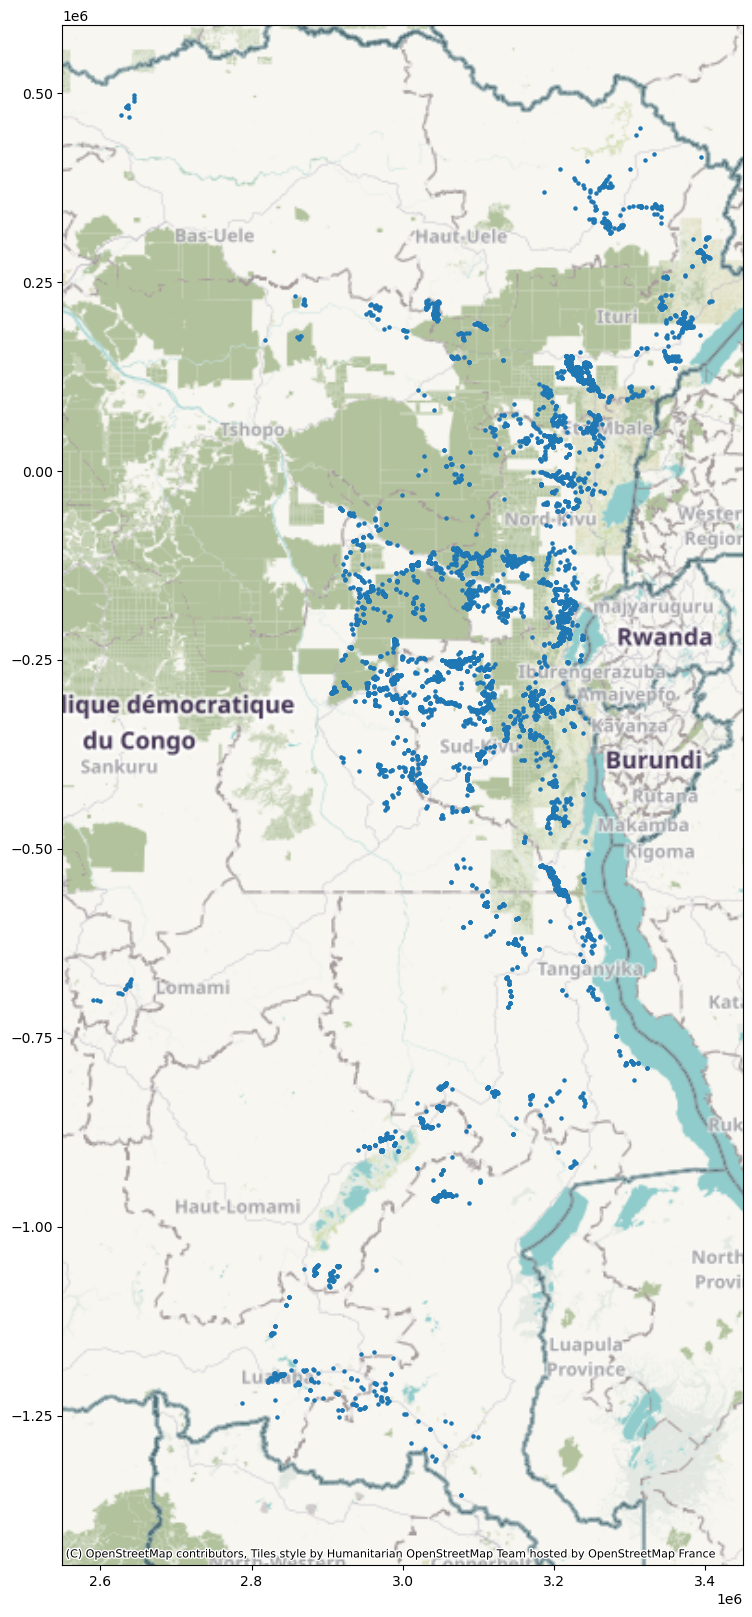

In [178]:
import contextily
ax = data_visits.to_crs(epsg=3857).plot(figsize=(10,20), markersize=5)
contextily.add_basemap(ax=ax)

### Countries and Borders

The basemap suggests that the mines are mostly in Congo, however, the border is porous and some mines might be located in the neighboring Burundi. Find out if this is the case.

In [183]:
# Load the countries dataset
countries = geopandas.read_file("data/ne_110m_admin_0_countries.zip")
print('countries.crs=')
print(countries.crs)
print('countries.columns=')
print(countries.columns)

# Create overlay between mines and countries datasets using intersection. 
# keep_geom_type=False : we want all resulting geometries, not just those with the same geometry types (countries uses Polygon and multi-Polygon).
mines_overlay = geopandas.overlay(countries, data_visits, how='intersection', keep_geom_type=False)
print('mines_overlay.shape=')
print(mines_overlay.shape)
print('mines_overlay.columns=')
print(mines_overlay.columns)
# List of countries and mines found in each country.
print(mines_overlay.name_1.value_counts())

mines_overlay.head()

countries.crs=
EPSG:4326
countries.columns=
Index(['iso_a3', 'name', 'continent', 'pop_est', 'gdp_md_est', 'geometry'], dtype='object')
mines_overlay.shape=
(6955, 90)
mines_overlay.columns=
Index(['iso_a3', 'name_1', 'continent', 'pop_est', 'gdp_md_est', 'vid', 'cid',
       'id', 'source', 'project', 'pcode', 'name_2', 'visit_date',
       'visit_onsite', 'visit_onsite_novisitreason', 'longitude', 'latitude',
       'location_origin', 'province', 'province_old', 'territoire',
       'collectivite', 'groupement', 'village', 'workers_numb', 'access_dry',
       'access_wet', 'is_3t_mine', 'is_gold_mine', 'mineral1',
       'selling_points_mineral1', 'final_destination_mineral1', 'mineral2',
       'selling_points_mineral2', 'final_destination_mineral2', 'mineral3',
       'selling_points_mineral3', 'final_destination_mineral3', 'mercury',
       'presence', 'interference', 'armed_group1', 'type_armed_group1',
       'frequency_armed_group1', 'taxation_armed_group1',
       'commerce_ta

,iso_a3,name_1,continent,pop_est,gdp_md_est,vid,cid,id,source,project,...,state_service3,state_service4,traceability,qualification,childunder15,childunder15work,women,womenwork,geometry_type,geometry
0,BDI,Burundi,Africa,11466756.0,7892.0,1142,1045,1045,IPIS - Ministère des Mines,IPIS - PROMINES MoFA 2013-2014,...,None,None,None,None,NaN,None,NaN,None,0,POINT (29.06041 -2.86239)
1,BDI,Burundi,Africa,11466756.0,7892.0,3467,2793,2793,IPIS,IPIS - IOM 2016-2018,...,None,None,None,None,NaN,None,NaN,None,0,POINT (29.12292 -2.93462)
2,COD,Dem. Rep. Congo,Africa,83301151.0,66010.0,1,1,1,IPIS - Ministère des Mines,IPIS - 2009,...,None,None,None,None,NaN,None,NaN,None,0,POINT (28.71526 0.33702)
3,COD,Dem. Rep. Congo,Africa,83301151.0,66010.0,2,2,2,IPIS - Ministère des Mines,IPIS - 2009,...,None,None,None,None,NaN,None,NaN,None,0,POINT (28.69916 0.32153)
4,COD,Dem. Rep. Congo,Africa,83301151.0,66010.0,3,3,3,IPIS - Ministère des Mines,IPIS - 2009,...,None,None,None,None,NaN,None,NaN,None,0,POINT (28.18514 0.54499)


The provided dataset contains a lot of information, much more than we are going to use in this tutorial. Therefore, we will select a subset of the column:

In [184]:
data_visits = data_visits[['vid', 'project', 'visit_date', 'name', 'pcode', 'workers_numb', 'interference', 'armed_group1', 'mineral1', 'geometry']]

In [185]:
data_visits.head()

,vid,project,visit_date,name,pcode,workers_numb,interference,armed_group1,mineral1,geometry
0,1,IPIS - 2009,2009-01-01Z,Eohe,codmine00191,300.0,NaN,None,Or,POINT (28.71526 0.33702)
1,2,IPIS - 2009,2009-01-01Z,Eita,codmine00192,110.0,NaN,None,Or,POINT (28.69916 0.32153)
2,3,IPIS - 2009,2009-01-01Z,Mungu Iko,codmine00242,NaN,NaN,FARDC,Or,POINT (28.18514 0.54499)
3,4,IPIS - 2009,2009-01-01Z,Kiviri/Tayna,codmine00260,NaN,NaN,FDLR,Or,POINT (28.88453 -0.35253)
4,5,IPIS - 2009,2009-01-01Z,Makanga,codmine00272,NaN,NaN,FDLR,Or,POINT (28.90395 -0.03671)


Before starting the actual geospatial tutorial, we will use some more advanced pandas queries to construct a subset of the data that we will use further on: 

In [186]:
# Take only the data of visits by IPIS
data_ipis = data_visits[data_visits['project'].str.contains('IPIS') & (data_visits['workers_numb'] > 0)]

In [194]:
# For those mining sites that were visited multiple times, take only the last visit
data_ipis_lastvisit = data_ipis.sort_values('visit_date').groupby('pcode', as_index=False).last()
print(data_ipis_lastvisit.head())
data = geopandas.GeoDataFrame(data_ipis_lastvisit)
data = data.set_crs(data_visits.crs)

          pcode  vid                         project   visit_date  \
0  codmine00001  657  IPIS - PROMINES MoFA 2013-2014  2013-03-27Z   
1  codmine00002  658  IPIS - PROMINES MoFA 2013-2014  2013-03-27Z   
2  codmine00003  659  IPIS - PROMINES MoFA 2013-2014  2013-03-27Z   
3  codmine00004  660  IPIS - PROMINES MoFA 2013-2014  2013-03-27Z   
4  codmine00005  661  IPIS - PROMINES MoFA 2013-2014  2013-03-27Z   

                                 name  workers_numb  interference  \
0                           Mayi-Tatu         150.0           1.0   
1                             Mabanga         115.0           1.0   
2                             Molende         130.0           1.0   
3                          Embouchure         135.0           1.0   
4  Apumu-Atandele-Jerusalem-Luka Yayo         270.0           1.0   

  armed_group1 mineral1                  geometry  
0        FARDC       Or  POINT (29.66033 1.01089)  
1        FARDC       Or  POINT (29.65862 1.00308)  
2        FARDC

### Data on protected areas in the same region

Next to the mining site data, we are also going to use a dataset on protected areas (national parks) in Congo. This dataset was downloaded from http://www.wri.org/our-work/project/congo-basin-forests/democratic-republic-congo#project-tabs and included in the tutorial repository: `data/cod_conservation.zip`.

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Extract the `data/cod_conservation.zip` archive, and read the shapefile contained in it. Assign the resulting GeoDataFrame to a variable named `protected_areas`.</li>
  <li>Quickly plot the GeoDataFrame.</li>
 </ul> 
</div>

In [200]:
protected_areas = geopandas.read_file('data/cod_conservation/Conservation/RDC_aire_protegee_2013.shp')
print(protected_areas.crs)
print(protected_areas.shape)
pd.set_option('display.max_colwidth', 20)
protected_areas.head()

PROJCS["RDC_Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mercator_2SP"],PARAMETER["standard_parallel_1",5],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
(50, 28)


,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,...,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
0,WWF/RDC,WWF/RDC,2007-04-18,GPS / Numérisation,Réserve de biosp...,Réserve de biosp...,oui,Créé,133507.042122,0,...,Nature Reserve,Luki Biosphere R...,1,0,32968.0,3.105933e+04,C:\Program Files...,NaN,C:\Program Files...,POLYGON ((146901...
1,WWF/EARPO,WWF/EARPO,2007-04-18,GPS / Numérisation,Réserve naturell...,Réserve naturelle,oui,Créé,726569.150601,0,...,Nature Reserve,Itombwe Nature R...,2,0,605000.0,6.009095e+05,C:\Program Files...,NaN,C:\Program Files...,POLYGON ((313206...
2,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Réserve de faune...,Réserve naturelle,oui,Opérationnel,699413.460963,0,...,Nature Reserve,Okapi Faunal Res...,3,0,1372625.0,1.384674e+06,C:\Program Files...,NaN,C:\Program Files...,POLYGON ((319798...
3,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de...,Parc National,oui,Opérationnel,994020.751122,0,...,National park,Salonga National...,0,0,3600000.0,1.704580e+06,C:\Program Files...,NaN,C:\Program Files...,POLYGON ((238433...
4,SYGIAP,SYGIAP,2007-04-18,GPS / Numérisation,Parc National de...,Parc National,oui,Opérationnel,867943.914321,0,...,National park,Salonga National...,0,0,0.0,1.612007e+06,C:\Program Files...,NaN,C:\Program Files...,POLYGON ((239993...


<Axes: >

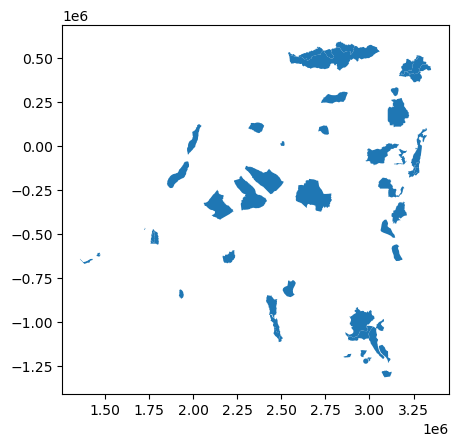

In [201]:
# %load _solved/solutions/case-conflict-mapping11.py
protected_areas.plot()

### Conversion to a common Coordinate Reference System

We will see that both datasets use a different Coordinate Reference System (CRS). For many operations, however, it is important that we use a consistent CRS, and therefore we will convert both to a common CRS.

But first, we explore problems we can encounter related to differences in CRSs.

---

[Goma](https://en.wikipedia.org/wiki/Goma) is the capital city of North Kivu province of Congo, close to the border with Rwanda. It's coordinates are 1.66°S 29.22°E.

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Create a single Point object representing the location of Goma. Call this `goma`.</li>
  <li>Calculate the distances of all mines to Goma, and show the 5 smallest distances (mines closest to Goma).</li>
 </ul> 
</div>

In [204]:
from shapely.geometry import Point

goma = Point(29.22, 1.66)

In [205]:
dist_from_goma = data.geometry.distance(goma)

C:\Users\sjahp\AppData\Local\Temp\ipykernel_51308\3294299929.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist_from_goma = data.geometry.distance(goma)


In [206]:
dist_from_goma.nsmallest(5)

1917    0.380617
1914    0.381322
1963    0.383632
2248    0.383738
2247    0.390143
dtype: float64

The distances we see here in degrees, which is not helpful for interpreting those distances. That is a reason we will convert the data to another coordinate reference system (CRS) for the remainder of this tutorial.

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a visualization of the national parks and the mining sites on a single plot.</li>
 </ul> 
 
<p>Check the first section of the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for tips and tricks to plot with GeoPandas.</p>
</div>

<Axes: >

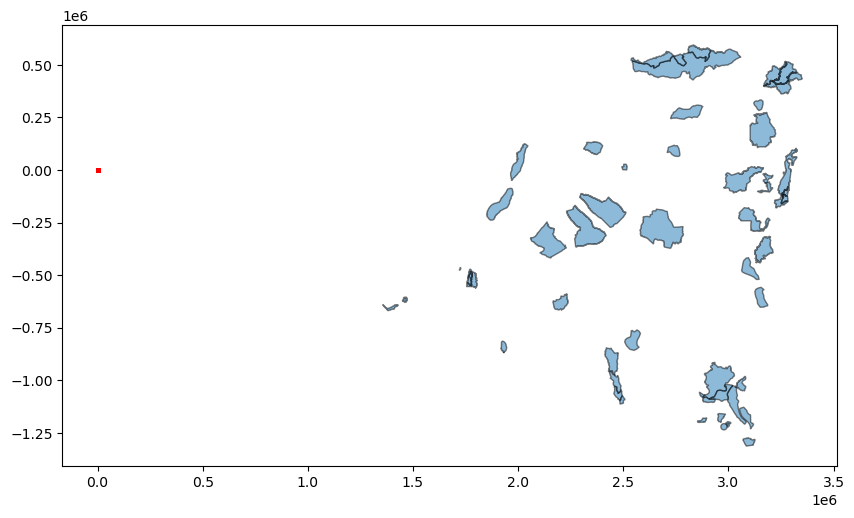

In [207]:
ax = data.plot(figsize=(10,20), markersize=5, color='r')
protected_areas.plot(ax=ax, edgecolor='k', alpha=0.5)

You will notice that the protected areas and mining sites do not map to the same area on the plot. This is because the Coordinate Reference Systems (CRS) differ for both datasets. Another reason we will need to convert the CRS!

Let's check the Coordinate Reference System (CRS) for both datasets.

The mining sites data uses the [WGS 84 lat/lon (EPSG 4326)](http://spatialreference.org/ref/epsg/4326/) CRS:

In [208]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The protected areas dataset, on the other hand, uses a [WGS 84 / World Mercator (EPSG 3395)](http://spatialreference.org/ref/epsg/wgs-84-world-mercator/) projection (with meters as unit):

In [209]:
protected_areas.crs

<Projected CRS: PROJCS["RDC_Mercator",GEOGCS["WGS 84",DATUM["WGS_1 ...>
Name: RDC_Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We will convert both datasets to a local UTM zone, so we can plot them together and that distance-based calculations give sensible results.

To find the appropriate UTM zone, you can check http://www.dmap.co.uk/utmworld.htm or https://www.latlong.net/lat-long-utm.html, and in this case we will use UTM zone 35, which gives use EPSG 32735: https://epsg.io/32735

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Convert both datasets (`data` and `protected_areas`) to EPSG 32735. Name the results `data_utm` and `protected_areas_utm`.</li>
  <li>Try again to visualize both datasets on a single map.</li>
 </ul> 

</div>

In [210]:
# Convert both datasets to CRS UTM Zone 35 South.
data_utm = data.to_crs(epsg=32735)
protected_areas_utm = protected_areas.to_crs(epsg=32735)

<Axes: >

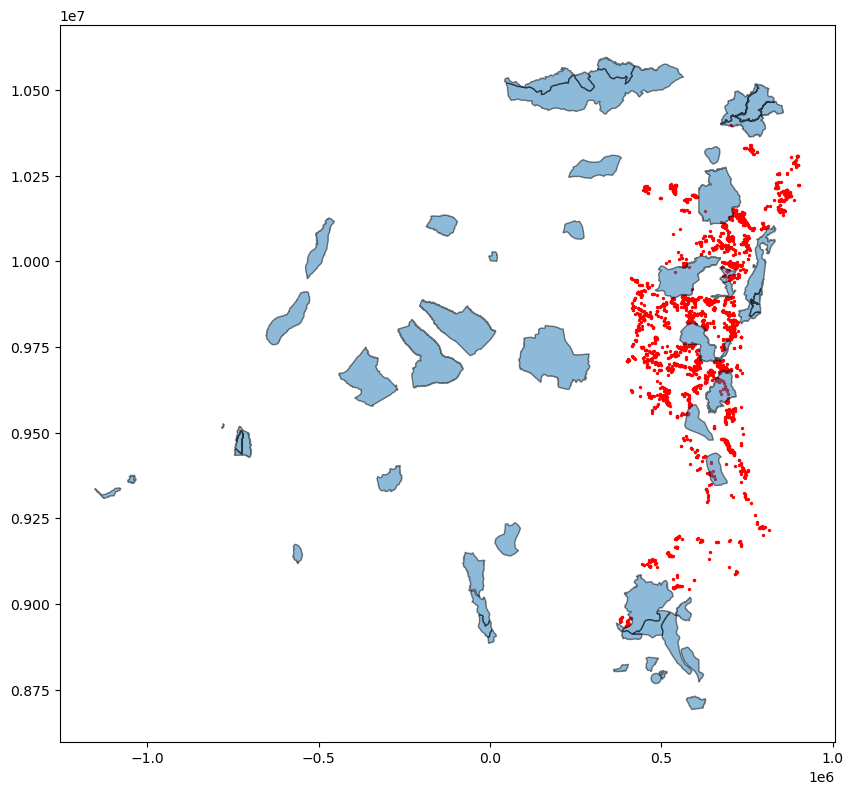

In [212]:
ax = data_utm.plot(figsize=(10,20), markersize=2, color='r')
protected_areas_utm.plot(ax=ax, edgecolor='k', alpha=0.5)

### More advanced visualizations

<p>For the following exercises, check the first section of the [04-more-on-visualization.ipynb](04-more-on-visualization.ipynb) notebook for tips and tricks to plot with GeoPandas.</p>

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Make a visualization of the national parks and the mining sites on a single plot.</li>
  <li>Pay attention to the following details:
     <ul>
      <li>Make the figure a bit bigger.</li>
      <li>The protected areas should be plotted in green</li>
      <li>For plotting the mining sites, adjust the markersize and use an `alpha=0.5`.</li>
      <li>Remove the figure border and x and y labels (coordinates)</li>
     </ul> 
   </li>
 </ul> 
</div>

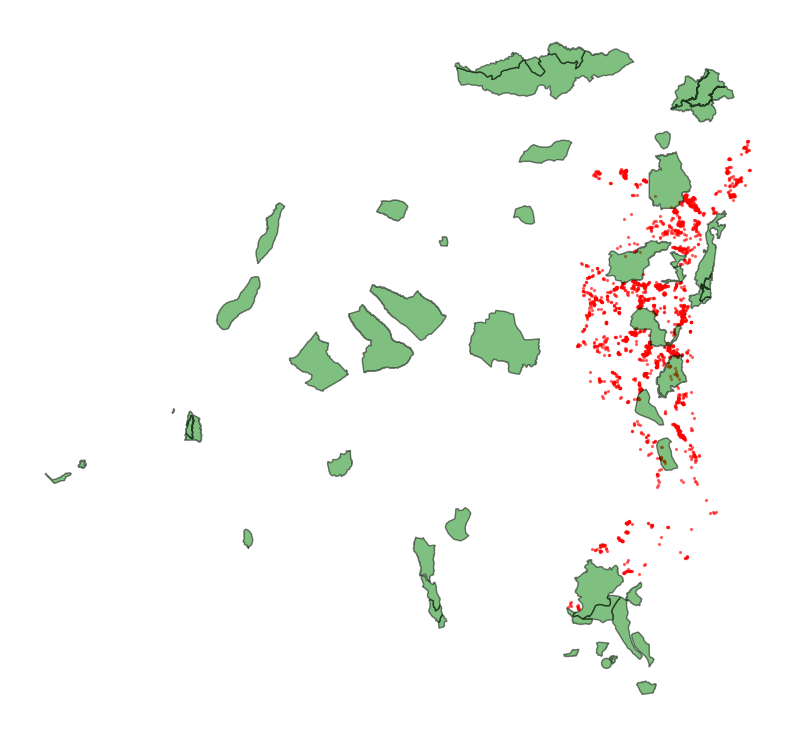

In [113]:
ax = data_utm.plot(figsize=(10,20), markersize=2, color='r', alpha=0.5)
protected_areas_utm.plot(ax=ax, edgecolor='k', color='g', alpha=0.5)
ax.set_axis_off()

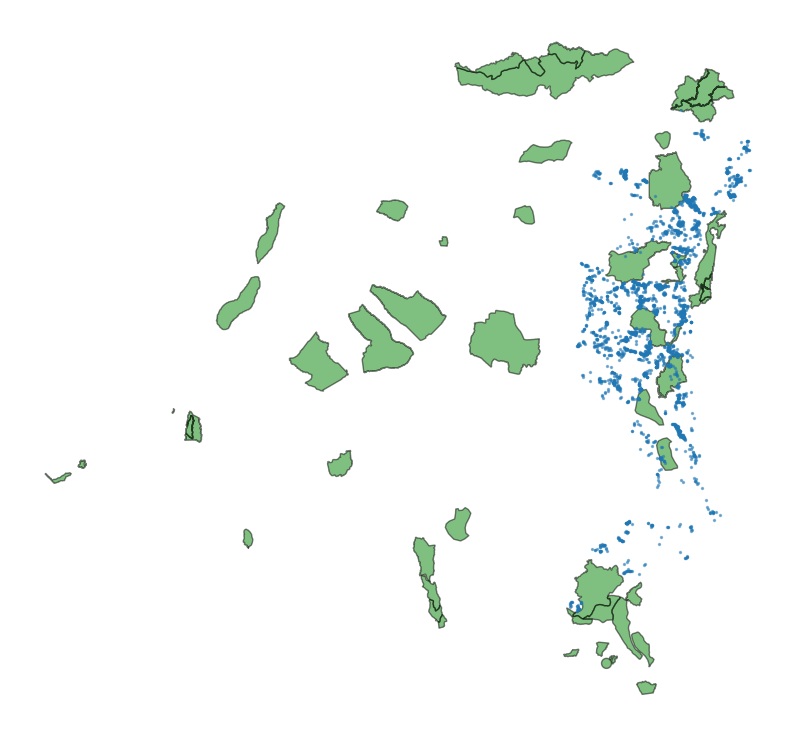

In [215]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect='equal'))
protected_areas_utm.plot(ax=ax, edgecolor='k', color='green', alpha=0.5)
data_utm.plot(ax=ax, markersize=2, alpha=0.5)
ax.set_axis_off()

<div class="alert alert-success">
 <b>EXERCISE</b>:
 
 In addition to the previous figure:
 <ul>
  <li>Give the mining sites a distinct color based on the `'interference'` column, indicating whether an armed group is present at the mining site or not.</li>
 </ul> 
</div>

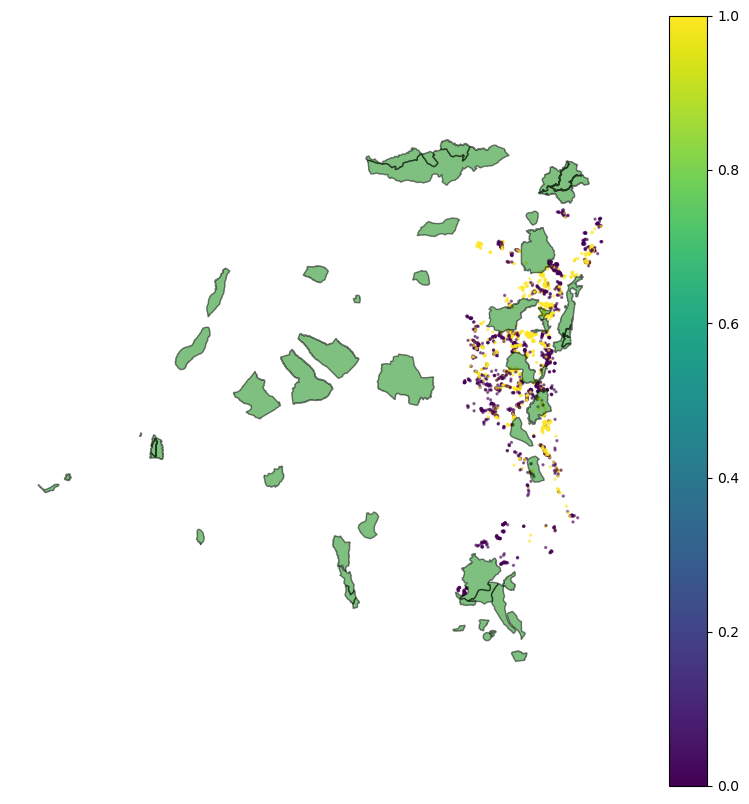

In [216]:
ax = data_utm.plot(figsize=(10,10), markersize=2, alpha=0.5, column='interference', legend=True)
protected_areas_utm.plot(ax=ax, edgecolor='k', color='g', alpha=0.5)
ax.set_axis_off()

<div class="alert alert-success">
 <b>EXERCISE</b>:
 
 In addition to the previous figure:
 <ul>
  <li>Give the mining sites a distinct color based on the `'mineral1'` column, indicating which mineral is the primary mined mineral.</li>
 </ul> 
</div>

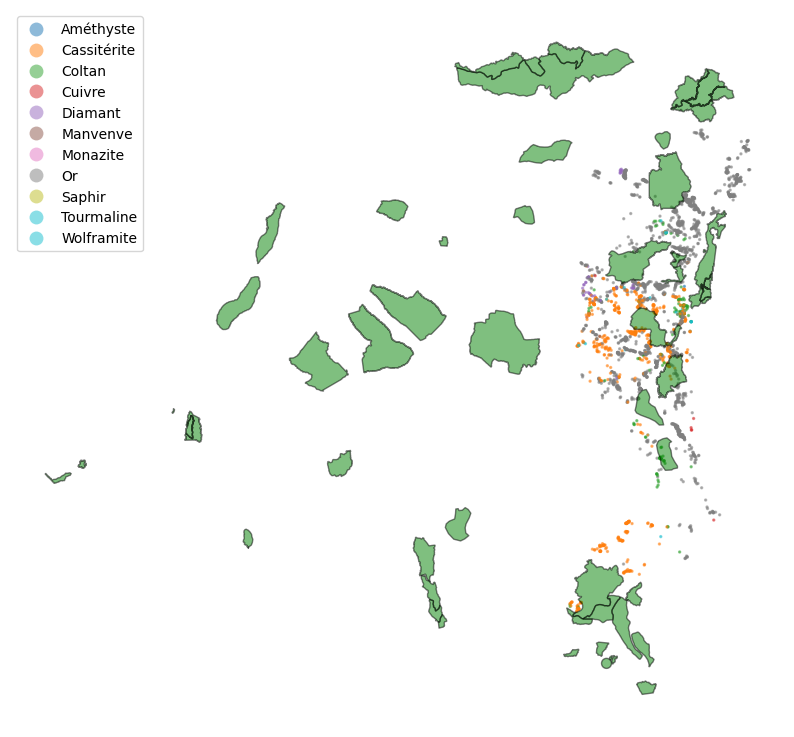

In [217]:
ax = data_utm.plot(figsize=(10,10), markersize=2, alpha=0.5, column='mineral1', legend=True)
protected_areas_utm.plot(ax=ax, edgecolor='k', color='g', alpha=0.5)
ax.set_axis_off()

## 2. Spatial operations

<div class="alert alert-success">
 <b>EXERCISE</b>:
 
 <ul>
  <li>Access the geometry of the "Kahuzi-Biega National park".</li>
  <li>Filter the mining sites to select those that are located in this national park.</li>
 </ul> 
</div>

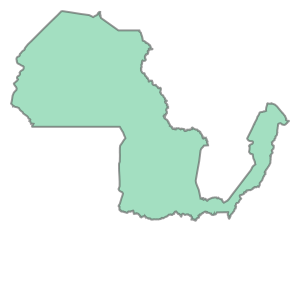

In [117]:
kahuzi_geometry = protected_areas_utm[protected_areas.NAME_AP == 'Kahuzi-Biega National park'].geometry.squeeze()
kahuzi_geometry

In [221]:
mines_in_kahuzi = data_utm[data_utm.within(kahuzi_geometry)]

In [222]:
print(f'Num of mines in this park = {len(mines_in_kahuzi)}')
mines_in_kahuzi.head(len(mines_in_kahuzi))

Num of mines in this park = 13


,pcode,vid,project,visit_date,name,workers_numb,interference,armed_group1,mineral1,geometry
654,codmine00680,1029,IPIS - PROMINES ...,2013-08-29Z,Ibozia/Kalumé,80.0,1.0,Raïa Mutomboki,Cassitérite,POINT (567832.70...
655,codmine00681,6788,IPIS - Madini,2023-03-22Z,Matamba,23.0,1.0,FARDC,Cassitérite,POINT (598323.53...
656,codmine00682,1028,IPIS - PROMINES ...,2013-08-28Z,Mutete/Mukina,170.0,1.0,Raïa Mutomboki,Cassitérite,POINT (570733.43...
657,codmine00683,1030,IPIS - PROMINES ...,2013-08-29Z,Mutete,100.0,1.0,Raïa Mutomboki,Cassitérite,POINT (569881.09...
753,codmine00779,1592,IPIS - PROMINES ...,2014-02-25Z,Mazankala,120.0,1.0,Raïa Mutomboki,Cassitérite,POINT (613075.53...
864,codmine00893,6207,IPIS - USAID,2022-07-16Z,Sebwa-Lukoma,383.0,1.0,Raïa Mutomboki,Cassitérite,POINT (660406.34...
865,codmine00894,1301,IPIS - PROMINES ...,2013-10-30Z,Rwamakaza,160.0,1.0,Raïa Mutomboki,Cassitérite,POINT (661266.83...
1484,codmine01764,176,IPIS - 2009,2009-01-01Z,Mugaba I,50.0,NaN,None,Or,POINT (685167.37...
1485,codmine01765,177,IPIS - 2009,2009-01-01Z,Mugaba Ouest,46.0,NaN,None,Or,POINT (683156.68...
1679,codmine01997,2492,IPIS - IOM PROMI...,2015-08-03Z,Nguba (Nkuba) Ka...,122.0,1.0,Raïa Mutomboki,Cassitérite,POINT (622151.34...


<div class="alert alert-success">
 <b>EXERCISE</b>: Determine for each mining site the "closest" protected area:
 
 <ul>
  <li> PART 1 - do this for a single mining site:
   <ul>
    <li>Get a single mining site, e.g. the first of the dataset.</li>
    <li>Calculate the distance (in km's) to all protected areas for this mining site</li>
    <li>Get the index of the minimum distance (tip: `idxmin()`) and get the name of the protected ares corresponding to this index.</li>
   </ul> 
  </li>
  <li> PART 2 - apply this procedure on each geometry:
   <ul>
    <li>Write the above procedure as a function that gets a single site and the protected areas dataframe as input and returns the name of the closest protected area as output.</li>
    <li>Apply this function to all sites using the `.apply()` method on `data_utm.geometry`.</li>
   </ul> 
  </li>
 </ul> 
</div>

In [223]:
mine_0_geometry = data_utm.iloc[0].geometry
print(mine_0_geometry)

POINT (796089.4159891906 10111855.174263744)


In [229]:
distance_mine_0 = protected_areas_utm.geometry.distance(mine_0_geometry) / 10**3
print(protected_areas_utm.shape)
print(distance_mine_0.shape)
distance_mine_0.head(len(distance_mine_0))

(50, 28)
(50,)


0     1975.935526
1      438.272563
2       83.700206
3      972.362531
4      841.080383
5      159.477986
6     1167.623940
7     1081.371625
8      522.905113
9      483.860866
10    1133.980107
11     684.743407
12    1166.480198
13     221.727176
14    1649.760678
15     564.886229
16    2027.803736
17     453.749235
18     891.010992
19    1340.168121
20     192.293642
21     347.993902
22      21.567059
23     157.864269
24     194.201127
25     311.654895
26     251.555893
27     311.469474
28     298.344508
29     635.081584
30    1243.642981
31    1306.362724
32    1395.043331
33     568.909001
34    1275.792112
35    1347.019533
36    1113.154353
37    1169.434125
38    1362.068006
39    1407.490733
40    1425.909524
41     232.566358
42    1273.524505
43    1678.764558
44    1620.183161
45    1636.308292
46     780.532490
47    1250.719644
48    1338.208766
49    1350.820751
dtype: float64

In [230]:
min_idx = distance_mine_0.idxmin()
print(min_idx)
closest_park = protected_areas_utm.iloc[min_idx]['NAME_AP']
closest_park

22


'Virunga National park'

In [269]:
def find_closest_park(mine_geometry, protected_areas_df):
    distances = protected_areas_df.geometry.distance(mine_geometry)
    min_dist_idx = distances.idxmin()
    closest_park_name = protected_areas.loc[min_dist_idx,'NAME_AP']
    return closest_park_name

In [270]:
data_utm['closest_national_park'] = data_utm.geometry.apply(lambda c : find_closest_park(c, protected_areas_utm))

C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance
  return lib.distance(a, b, **kwargs)
C:\Users\sjahp\anaconda3\envs\tfdml\lib\site-packages\shapely\measurement.py:74: RuntimeWarning: invalid value encountered in distance


In [244]:
pd.set_option('display.max_colwidth', 40)
print(data_utm['closest_national_park'].head(10))

0    Virunga National park
1    Virunga National park
2    Virunga National park
3    Virunga National park
4    Virunga National park
5    Virunga National park
6    Virunga National park
7    Virunga National park
8    Virunga National park
9    Virunga National park
Name: closest_national_park, dtype: object


#### Why do we get so many RuntimeWarning from the distance calculation?

* Both the protected areas and the mines are alredy in UTM, so the distance calculation should yield valid results.
* Is it possible that the RuntimeWarning is caused by the distance calculation when a mine (Point) are within a protected area (Polygon)?
* To explore this possibility, we take one protected area `Tayna Nature Reserve`, and isolate the mines within the park using the `within` spatial operation.
* Next, calculate distances from each of the mines within the park to the park itself. The `distance()` function should return zero when a Point is found within a Polygon.

In [252]:
tayna_nature_reserve = protected_areas_utm[protected_areas_utm['NAME_AP'] == 'Tayna Nature Reserve']
tayna_nature_reserve

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,...,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
23,CI/DFGFI,CI/DFGFI,2007-04-18,GPS / Numérisation,Réserve naturelle de Tayna,Réserve naturelle,oui,Opérationnel,196760.18886,0,...,Nature Reserve,Tayna Nature Reserve,10,0,90000.0,89292.352397,C:\Program Files\Atlas RDC 1.0\Docum...,NaN,C:\Program Files\Atlas RDC 1.0\Docum...,"POLYGON ((670993.738 9949574.441, 67..."


In [258]:
mines_in_tayna = data_utm[data_utm.geometry.within(tanya_nature_reserve.geometry.item())]
print(len(mines_in_tayna))
mines_in_tayna.head(14)

14


,pcode,vid,project,visit_date,name,workers_numb,interference,armed_group1,mineral1,geometry,closest_national_park
250,codmine00260,5890,IPIS - USAID,2022-02-16Z,Kiviri/Tayna,78.0,1.0,Maï-Maï FPP/AP,Or,POINT (709734.913 9961013.720),Tayna Nature Reserve
2324,codmine03323,4410,IPIS - IOM 2016-2018,2018-12-19Z,Kanyabi,105.0,1.0,NDC-Rénové,Or,POINT (694007.830 9971029.838),Tayna Nature Reserve
2325,codmine03324,4411,IPIS - IOM 2016-2018,2018-12-19Z,Ngoma,52.0,1.0,NDC-Rénové,Or,POINT (693343.363 9972108.466),Tayna Nature Reserve
2326,codmine03325,4412,IPIS - IOM 2016-2018,2018-12-20Z,Tozali,150.0,1.0,NDC-Rénové,Or,POINT (693348.372 9972103.306),Tayna Nature Reserve
2327,codmine03326,4413,IPIS - IOM 2016-2018,2018-12-20Z,Momanda,68.0,1.0,NDC-Rénové,Or,POINT (693356.909 9972121.366),Tayna Nature Reserve
2328,codmine03327,4414,IPIS - IOM 2016-2018,2018-12-20Z,Mogomba,97.0,1.0,NDC-Rénové,Or,POINT (693341.507 9972108.098),Tayna Nature Reserve
2329,codmine03328,4415,IPIS - IOM 2016-2018,2018-12-20Z,Lundama,20.0,1.0,NDC-Rénové,Or,POINT (694101.756 9973873.432),Tayna Nature Reserve
2359,codmine03361,4416,IPIS - IOM 2016-2018,2018-12-20Z,Mbau,55.0,1.0,NDC-Rénové,Or,POINT (692376.384 9972059.260),Tayna Nature Reserve
2360,codmine03362,5871,IPIS - USAID,2022-02-15Z,Mbange,75.0,1.0,Maï-Maï FPP/AP,Or,POINT (692554.293 9972160.837),Tayna Nature Reserve
2366,codmine03368,4427,IPIS - IOM 2016-2018,2018-12-24Z,Kenya,51.0,1.0,NDC-Rénové,Or,POINT (692754.755 9971960.082),Tayna Nature Reserve


<Axes: >

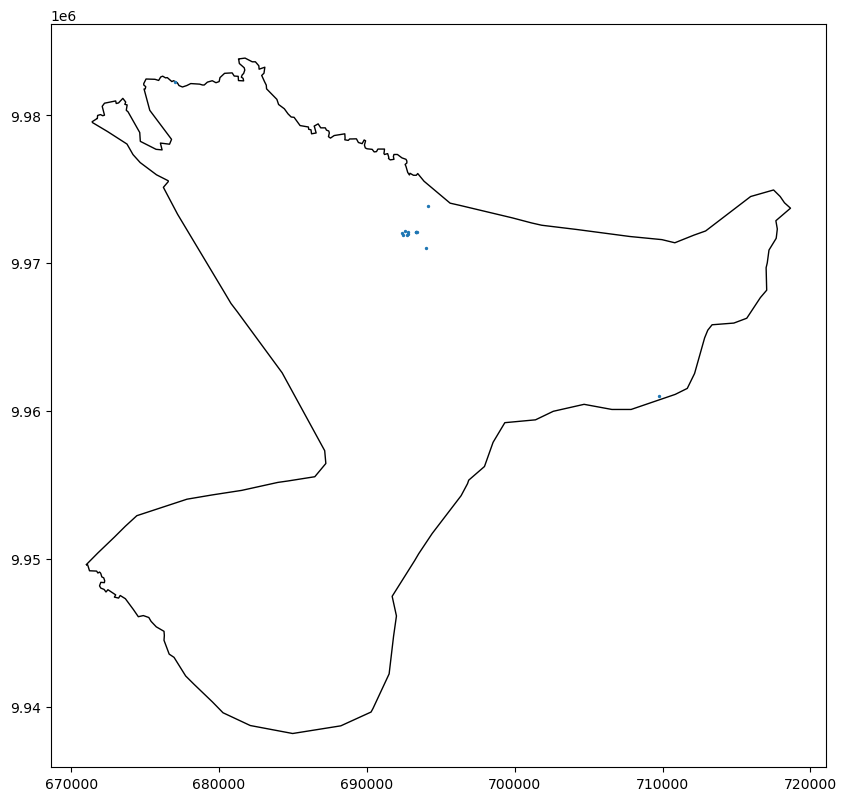

In [260]:
ax = tanya_nature_reserve.plot(figsize=(10,10), facecolor='none')
mines_in_tayna.plot(ax=ax, markersize=2)

In [268]:
tayna_nature_reserve.distance(mines_in_tayna.iloc[0].geometry)

23    0.0
dtype: float64

### Check the geometry validity

* Check if the 50 protected areas (national parks) have valid geometry using `.is_valid` attribute in the geometry.
* We found the geometry for Itombwe Nature Reserve to be invalid.
* Try to fix this by applying `.buffer(0)`. This usually does the trick.

In [284]:
# Check if all geometry is valid in both protected_areas_utm and data_utm.
pd.set_option('display.max_colwidth', 40)
park_with_invalid_geometry = protected_areas_utm[~protected_areas_utm.geometry.is_valid]
park_with_invalid_geometry

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,...,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry
1,WWF/EARPO,WWF/EARPO,2007-04-18,GPS / Numérisation,Réserve naturelle d'Itombwe,Réserve naturelle,oui,Créé,726569.150601,0,...,Nature Reserve,Itombwe Nature Reserve,2,0,605000.0,600909.514083,C:\Program Files\Atlas RDC 1.0\Docum...,NaN,C:\Program Files\Atlas RDC 1.0\Docum...,"POLYGON ((637994.488 9590686.863, 63..."


In [285]:
# Apply buffer(0) in an attempt to fix the invalid geometry. Why is it invalid? Need to research this.

protected_areas_utm['geometry'] = protected_areas_utm.geometry.buffer(0)
park_with_invalid_geometry_2 = protected_areas_utm[~protected_areas_utm.geometry.is_valid]
park_with_invalid_geometry_2

,SCE_SEM,SCE_GEO,DATE_,ORIGINE,NOM,REGLEMENT,VALID,Statut,Shape_Leng,Categorie,...,TYPE2_AP,NAME_AP,Ordre,OID_,Sup_Admini,Sup_SIG,Texte,Réf_Juridi,Espèces,geometry


**It Works!!** Applying a buffer of zero fixed the invalid polygon. Need to figure out why it was invalid to begin with.
Now, lets rerun the operation to find the closest protected area from each mines. We should not get the RuntimeWarning this time.

In [287]:
data_utm['closest_national_park'] = data_utm.geometry.apply(lambda c : find_closest_park(c, protected_areas_utm))
data_utm.head()

,pcode,vid,project,visit_date,name,workers_numb,interference,armed_group1,mineral1,geometry,closest_national_park
0,codmine00001,657,IPIS - PROMINES MoFA 2013-2014,2013-03-27Z,Mayi-Tatu,150.0,1.0,FARDC,Or,POINT (796089.416 10111855.174),Virunga National park
1,codmine00002,658,IPIS - PROMINES MoFA 2013-2014,2013-03-27Z,Mabanga,115.0,1.0,FARDC,Or,POINT (795899.664 10110990.840),Virunga National park
2,codmine00003,659,IPIS - PROMINES MoFA 2013-2014,2013-03-27Z,Molende,130.0,1.0,FARDC,Or,POINT (795641.707 10109059.787),Virunga National park
3,codmine00004,660,IPIS - PROMINES MoFA 2013-2014,2013-03-27Z,Embouchure,135.0,1.0,FARDC,Or,POINT (794376.309 10110622.250),Virunga National park
4,codmine00005,661,IPIS - PROMINES MoFA 2013-2014,2013-03-27Z,Apumu-Atandele-Jerusalem-Luka Yayo,270.0,1.0,FRPI,Or,POINT (796057.504 10105781.548),Virunga National park


## 3. Using spatial join to determine mining sites in the protected areas

Based on the analysis and visualizations above, we can already see that there are mining sites inside the protected areas. Let's now do an actual spatial join to determine which sites are within the protected areas.

### Mining sites in protected areas

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Add information about the protected areas to the mining sites dataset, using a spatial join:
   <ul>
    <li>Call the result `data_within_protected`</li>
    <li>If the result is empty, this is an indication that the coordinate reference system is not matching. Make sure to re-project the data (see above).</li>
      
   </ul>
  </li>
  <li>How many mining sites are located within a national park?</li>
  <li>Count the number of mining sites per national park (pandas tip: check `value_counts()`)</li>

 </ul> 

</div>

In [288]:
data_within_protected = geopandas.sjoin(data_utm, protected_areas_utm[['NAME_AP', 'geometry']], predicate='within', how='inner')

In [289]:
data_within_protected.shape

(97, 13)

In [291]:
# Total mining sites per National Park
# Note, this finds 14 mines within the Tayna Nature Reserve, 
# just as we previously found using a direct application of `within()` to the geometry of Tayna.
data_within_protected['NAME_AP'].value_counts().sort_values(ascending=False)

NAME_AP
Itombwe Nature Reserve             28
Luama-Katanga Hunting Domain       22
Tayna Nature Reserve               14
Kahuzi-Biega National park         13
Luama-Kivu Hunting Domain           9
Okapi Faunal Reserve                5
Maiko National park                 3
Upemba National park                2
Gangala Na Bodio Hunting Domain     1
Name: count, dtype: int64

In [292]:
# Total miners who work in each National Park.
data_within_protected.groupby(by='NAME_AP')['workers_numb'].sum().sort_values(ascending=False)

NAME_AP
Itombwe Nature Reserve             3531.0
Luama-Katanga Hunting Domain       2347.0
Kahuzi-Biega National park         1382.0
Tayna Nature Reserve               1214.0
Okapi Faunal Reserve                997.0
Luama-Kivu Hunting Domain           834.0
Maiko National park                 493.0
Upemba National park                108.0
Gangala Na Bodio Hunting Domain      98.0
Name: workers_numb, dtype: float64

### Mining sites in the borders of protected areas

And what about the borders of the protected areas? (just outside the park)
Recall, if the mines are within the park the distance between the park and the mines are zeros.

<div class="alert alert-success">
 <b>EXERCISE</b>:
 <ul>
  <li>Create a new dataset, `protected_areas_borders`, that contains the border area (10 km wide) of each protected area:
   <ul>
    <li>Tip: one way of doing this is with the `buffer` and `difference` function.</li>
    <li>Plot the resulting borders as a visual check of correctness.</li>
   </ul>
  </li>
  <li>Count the number of mining sites per national park that are located within its borders</li>

 </ul> 

</div>

In [145]:
protected_areas_borders = protected_areas_utm.copy()
protected_areas_borders['geometry'] = protected_areas_borders.buffer(10000).difference(protected_areas_utm.geometry.unary_union)

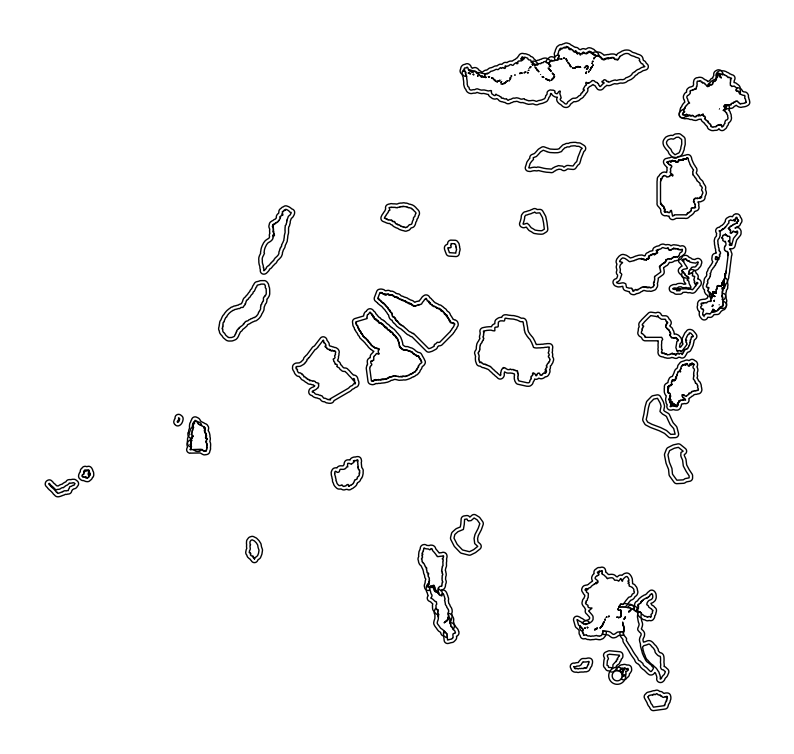

In [295]:
ax = protected_areas_borders.plot(figsize=(10,10), facecolor='none')
ax.set_axis_off()

In [296]:
data_within_protected_borders = geopandas.sjoin(data_utm, protected_areas_borders[['NAME_AP', 'geometry']], predicate='within', how='inner')

In [297]:
data_within_protected_borders.shape

(389, 13)

In [298]:
data_within_protected_borders['NAME_AP'].value_counts()

NAME_AP
Kahuzi-Biega National park      124
Okapi Faunal Reserve             63
Itombwe Nature Reserve           41
Maiko National park              40
Tayna Nature Reserve             37
Kisimba Ikobo Nature Reserve     25
Luama-Kivu Hunting Domain        23
Upemba National park             15
Luama-Katanga Hunting Domain     10
Virunga National park             8
Mulumbu Hunting Domain            3
Name: count, dtype: int64

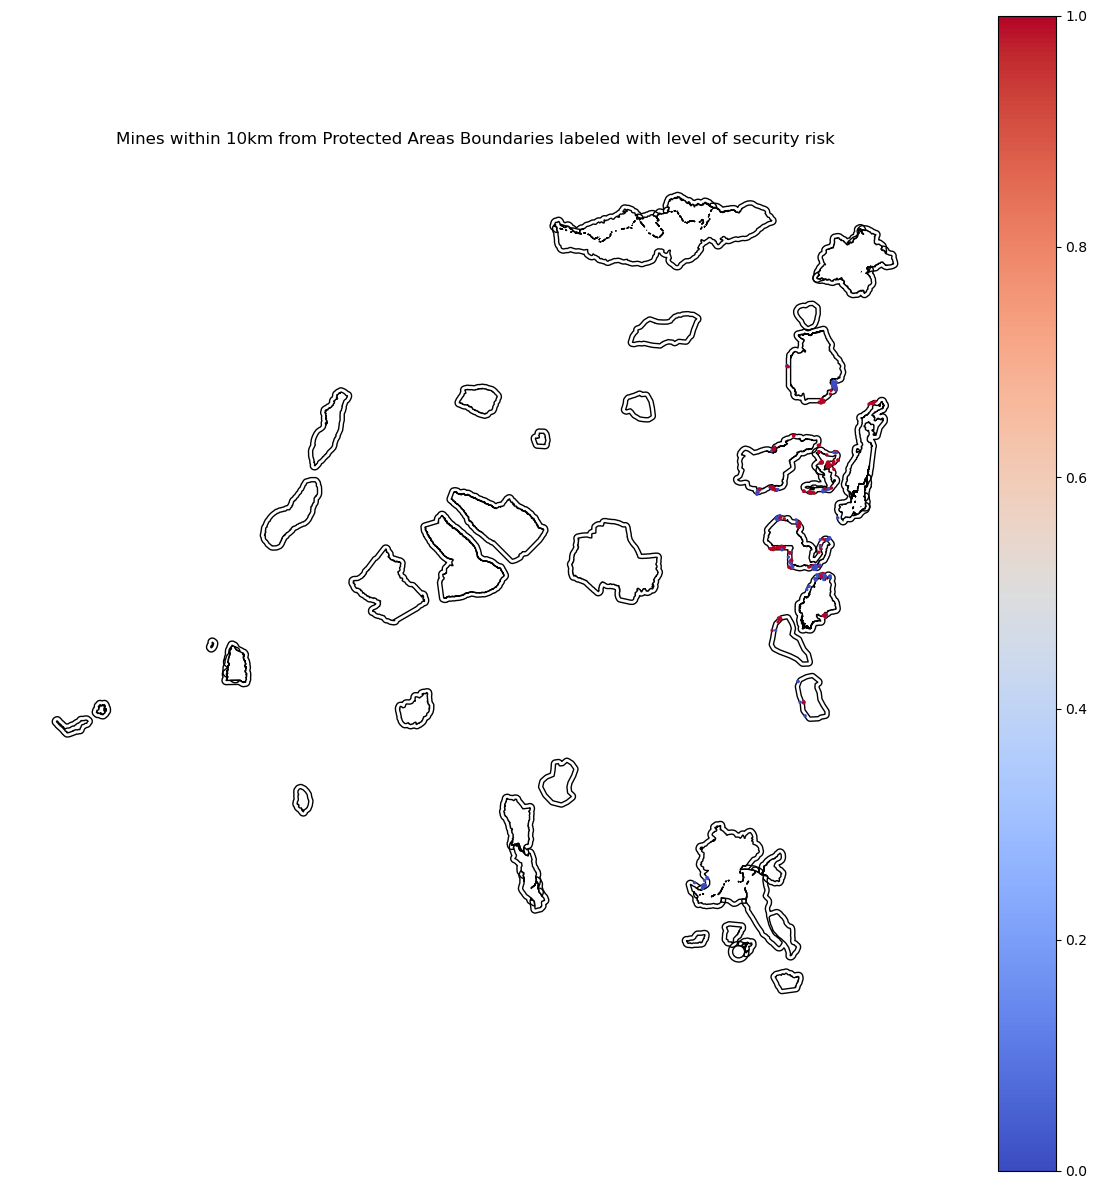

In [306]:
ax = protected_areas_borders.plot(figsize=(15,15), facecolor='none')
data_within_protected_borders.plot(ax=ax, markersize=2, column='interference', cmap='coolwarm', legend=True)
ax.set_title('Mines within 10km from Protected Areas Boundaries labeled with level of security risk')
ax.set_axis_off()